# COMP47670 Assignment 1- Task 2

Student number: 21211870

The name of the web API: The Movie DB (TMDB) [Free version]

## Analyze raw data

In [1]:
import json
from pathlib import Path
from datetime import datetime
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from pandas.plotting import scatter_matrix
from pandas.plotting import parallel_coordinates
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

Read the data from the csv file saved

In [2]:
# Read csv file
data_raw = pd.read_csv('movies_raw.csv')

# Check if there are rows with missing data
data_raw.isnull().sum()

budget                  0
genres                  5
original_language       0
popularity              0
production_countries    6
release_date            0
revenue                 0
runtime                 0
spoken_languages        4
vote_average            0
vote_count              0
dtype: int64

As we can see, there are some items for which there is no data.

We can use the describe() function to get a basic summary of the numeric values in a frame, which is returned as a new DataFrame with statistics for each columns:

In [3]:
# Convert the release_date column to a datetime type
data_raw['release_date'] = pd.to_datetime(data_raw['release_date'], format='%Y-%m-%d')

# Generate basic descriptive statistical information about the dataset
data_raw[['budget', 'popularity', 'release_date', 'revenue', 'runtime', 'vote_average', 'vote_count']].describe(datetime_is_numeric=True)

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count
count,1.961000e+03,1961.000000,1961,1.961000e+03,1961.000000,1961.000000,1961.000000
mean,1.918378e+07,17.752956,1987-10-08 08:13:27.751147392,7.483467e+07,108.240184,6.517936,2011.270780
min,0.000000e+00,0.600000,1895-03-22 00:00:00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,6.255000,1976-09-17 00:00:00,0.000000e+00,94.000000,6.194000,73.000000
50%,2.000000e+06,12.900000,1995-07-28 00:00:00,5.000000e+06,105.000000,6.897000,560.000000
75%,2.200000e+07,21.556000,2003-07-09 00:00:00,7.720000e+07,121.000000,7.400000,2144.000000
max,3.800000e+08,385.505000,2017-01-01 00:00:00,2.187464e+09,300.000000,10.000000,29341.000000
std,3.653095e+07,21.893588,NaN,1.599902e+08,28.300482,1.646558,3604.738266


As we can see, some data has a minimum value of 0. This does not mean that its actual data is 0, but indicates that it is missing this data. So in order to pursue the accuracy of the data study, the rows where these data contain 0 are simply discarded.

## Clean data and filter useful data

In [4]:
# Read csv file
data_raw = pd.read_csv('movies_raw.csv')

# Delete rows with missing data
data_raw.dropna(inplace=True)

# Delete rows containing 0
data_raw = data_raw[(data_raw != 0).all(1)]

# Renumber
data_raw.reset_index(drop=True, inplace=True)

# Write the processed data to a new csv file
data_raw.to_csv('movies.csv', index=False)

Read the data from the csv file saved

In [5]:
# read the dataset
df = pd.read_csv('movies.csv')

# Convert the release_date column to a datetime type
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')

# Generate basic descriptive statistical information about the dataset
df[['budget', 'popularity', 'release_date', 'revenue', 'runtime', 'vote_average', 'vote_count']].describe(datetime_is_numeric=True)

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count
count,1.066000e+03,1066.000000,1066,1.066000e+03,1066.000000,1066.000000,1066.000000
mean,3.458833e+07,27.033474,1991-11-05 02:12:22.964352768,1.363932e+08,116.880863,6.992090,3521.868668
min,9.000000e+00,1.572000,1915-02-08 00:00:00,3.700000e+01,69.000000,4.073000,17.000000
25%,5.000000e+06,14.170750,1986-05-10 18:00:00,1.473224e+07,101.000000,6.498500,815.250000
50%,1.816988e+07,19.830500,1997-10-03 00:00:00,6.206745e+07,114.000000,7.068000,1830.000000
75%,4.775000e+07,30.486750,2003-12-24 18:00:00,1.709309e+08,128.000000,7.538000,4398.250000
max,3.800000e+08,385.505000,2014-08-20 00:00:00,2.187464e+09,238.000000,8.712000,29341.000000
std,4.383232e+07,25.753031,NaN,1.968090e+08,23.201665,0.771446,4327.037634


In [6]:
# Check if there are rows with missing data
df.isnull().sum()

budget                  0
genres                  0
original_language       0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
vote_average            0
vote_count              0
dtype: int64

So far, we can be sure that each information in each row of data used contains valid data.

## Analyze valid data

####  Observe and study the top 20 movie data budget and revenue

In [7]:
# Show top 20 of budget
df.sort_values(by=["budget"], ascending=[False]).head(20)

,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
805,380000000,"Adventure,Action,Fantasy",en,105.010,"United Kingdom,United States of America",2011-05-14,1045713802,137,"English,Spanish",6.529,12693
173,300000000,"Adventure,Fantasy,Action",en,90.926,United States of America,2007-05-19,961000000,169,English,7.237,12842
667,270000000,"Science Fiction,Action,Adventure",en,22.346,United States of America,2006-06-28,391081192,154,"German,French,English",5.721,3685
308,258000000,"Fantasy,Action,Adventure",en,67.583,United States of America,2007-05-01,890871626,139,"English,French",6.382,12522
441,250000000,"Adventure,Fantasy",en,182.491,"United Kingdom,United States of America",2009-07-07,933959197,153,English,7.700,17419
989,225000000,"Adventure,Family,Fantasy",en,47.645,"Czech Republic,Poland,Slovenia,United States o...",2008-05-15,419665568,150,English,6.615,5690
830,215000000,"Action,Adventure,Fantasy",en,85.504,United States of America,2012-06-23,757930663,136,English,6.683,15810
157,207000000,"Adventure,Drama,Action",en,39.083,"New Zealand,United States of America,Germany",2005-12-12,562363449,187,English,6.858,7017
21,200000000,"Adventure,Fantasy,Action",en,90.537,United States of America,2006-07-06,1065659812,151,"English,Turkish,Greek,Mandarin",7.337,14318
338,200000000,"Drama,Romance",en,163.484,United States of America,1997-11-18,2187463944,194,"English,French,German,Swedish,Italian,Russian",7.900,22554


In [8]:
# Show top 20 of revenue
df.sort_values(by=["revenue"], ascending=[False]).head(20)

,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
338,200000000,"Drama,Romance",en,163.484,United States of America,1997-11-18,2187463944,194,"English,French,German,Swedish,Italian,Russian",7.900,22554
70,94000000,"Adventure,Fantasy,Action",en,96.269,"New Zealand,United States of America",2003-12-01,1118888979,201,English,8.474,21275
21,200000000,"Adventure,Fantasy,Action",en,90.537,United States of America,2006-07-06,1065659812,151,"English,Turkish,Greek,Mandarin",7.337,14318
805,380000000,"Adventure,Action,Fantasy",en,105.010,"United Kingdom,United States of America",2011-05-14,1045713802,137,"English,Spanish",6.529,12693
88,185000000,"Drama,Action,Crime,Thriller",en,88.230,"United Kingdom,United States of America",2008-07-14,1004558444,152,"English,Mandarin",8.508,29341
394,125000000,"Adventure,Fantasy",en,186.307,"United Kingdom,United States of America",2001-11-16,976475550,152,English,7.913,24393
173,300000000,"Adventure,Fantasy,Action",en,90.926,United States of America,2007-05-19,961000000,169,English,7.237,12842
3,94000000,"Animation,Family",en,89.577,United States of America,2003-05-30,940335536,100,English,7.824,17442
398,150000000,"Adventure,Fantasy,Mystery",en,167.623,"United Kingdom,United States of America",2007-06-28,938212738,138,English,7.686,17503
441,250000000,"Adventure,Fantasy",en,182.491,"United Kingdom,United States of America",2009-07-07,933959197,153,English,7.700,17419


By ranking the film budgets and profits and then taking the top 20, it is easy to see that the countries with the largest film budgets and profits for film production are basically the UK and the US. The only difference is that the top 20 budget movies tend to be from the most recent time period, while the top 20 profitable movies do not have much to do with the year.

#### Compare the number of appearances of film producing countries

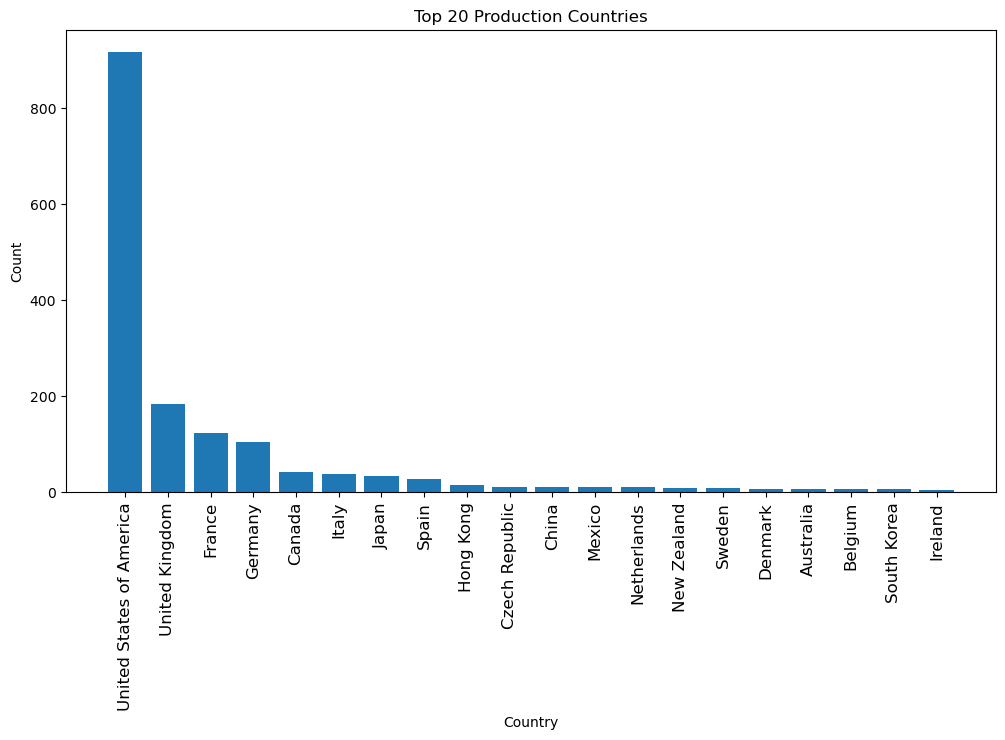

In [9]:
# Split production_countries into a list and expand it into a column
df['production_countries'] = df['production_countries'].str.split(',')
df = df.explode('production_countries')

# Remove possible spaces
df['production_countries'] = df['production_countries'].str.strip()

# Count the number of times each country appears
country_counts = df['production_countries'].value_counts()

# Take the top 10 countries with the highest number of occurrences
top_countries = country_counts.head(20)

# Convert the result into a pandas data frame
country_data = pd.DataFrame(top_countries).reset_index()
country_data.columns = ['country', 'count']

# Drawing Comparison
plt.figure(figsize=(12,6))  # Set the image size to 12x6
plt.bar(country_data['country'], country_data['count'])
plt.title('Top 20 Production Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=12)  # Rotate 90 degrees, font size 12
plt.show()

From the above statistical chart, it is easy to see that the United States mainly covers all film production. This is followed by the UK, France and Germany. These 3 countries also occupy a fairly significant proportion.

#### Compare the proportion of various genres of movies

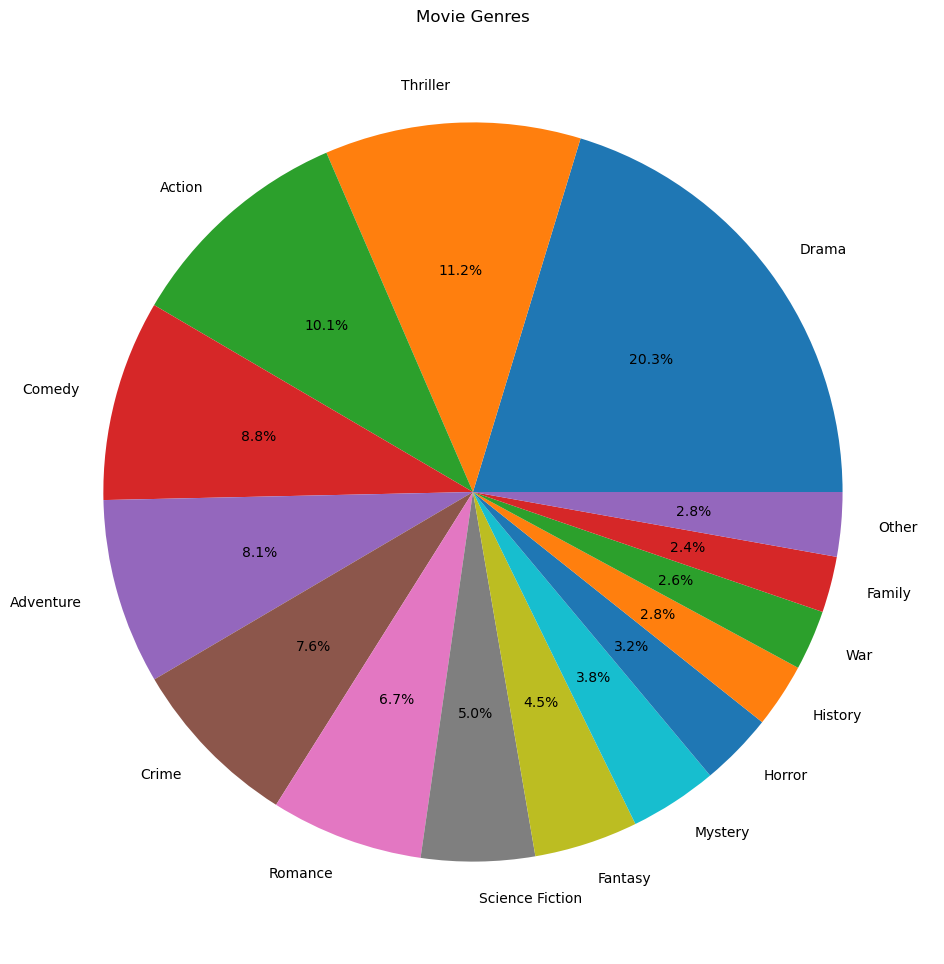

In [10]:
# Split genres into a list and expand it into a column
df['genres'] = df['genres'].str.split(',')
df = df.explode('genres')

# Remove possible spaces
df['genres'] = df['genres'].str.strip()

# Count the number of occurrences of each genre
genre_counts = df['genres'].value_counts()

# Calculate the percentage of each genre
total_count = genre_counts.sum()
genre_proportions = genre_counts / total_count

# Combine all parts where the percentage is less than 1%
other_proportion = genre_proportions[genre_proportions < 0.01].sum()
genre_proportions = genre_proportions[genre_proportions >= 0.01]
genre_proportions.loc['Other'] = other_proportion

# Draw a pie chart for comparison
plt.figure(figsize=(12,12))  # Set the image size to 12x12
plt.pie(genre_proportions, labels=genre_proportions.index, autopct='%1.1f%%')
plt.title('Movie Genres')
plt.show()

From the pie chart, we can see that Drama is the most widespread movie genre, followed by Thriller, Action and Comedy.

#### Study the share of language used in the film

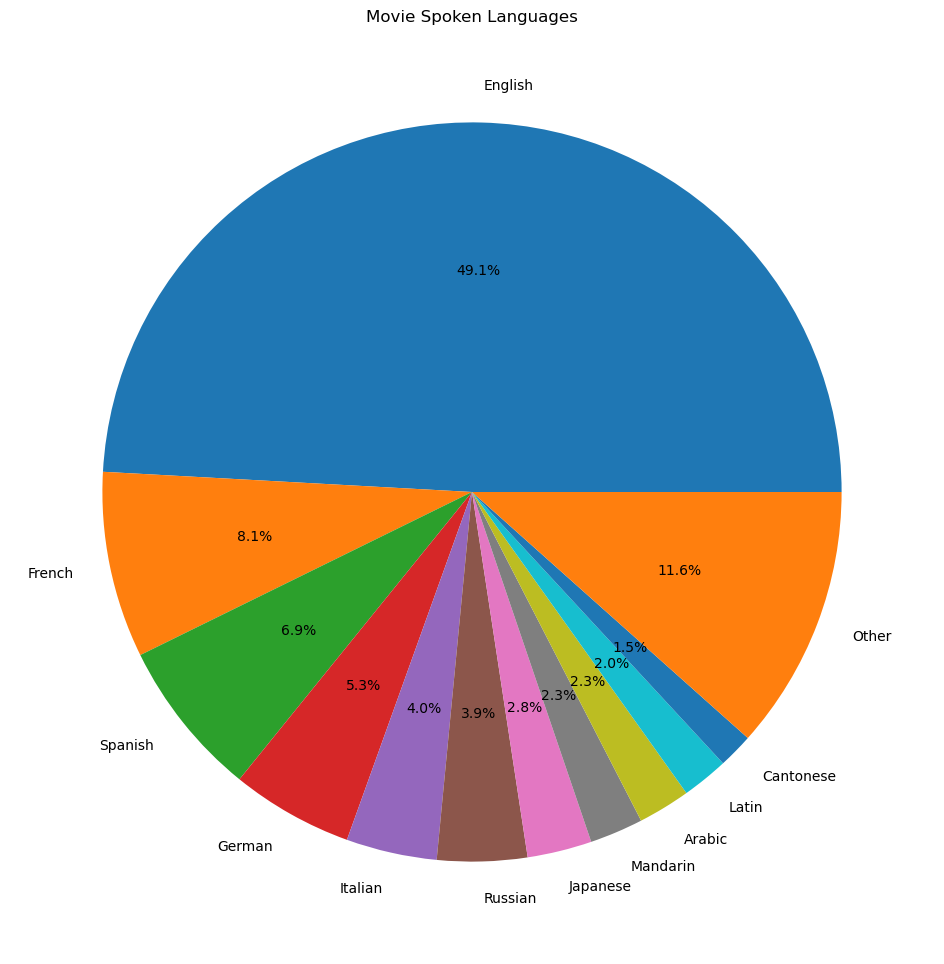

In [11]:
# Convert a comma-separated language string to a list of languages
df['spoken_languages'] = df['spoken_languages'].str.split(',')

# Convert the list of languages into separate rows
df = df.explode('spoken_languages')

# Remove the spaces before and after the language name
df['spoken_languages'] = df['spoken_languages'].str.strip()

# Count the number of occurrences of each language
language_count = df['spoken_languages'].value_counts()

# Convert the number of occurrences of each language into a percentage
total_count = language_count.sum()
language_proportions = language_count / total_count

# Combine languages with less than 1% of occurrences into one category
other_proportion = language_proportions[language_proportions < 0.01].sum()
language_proportions = language_proportions[language_proportions >= 0.01]
language_proportions.loc['Other'] = other_proportion

# Draw pie chart
plt.figure(figsize=(12, 12))
plt.pie(language_proportions, labels=language_proportions.index, autopct='%1.1f%%')
plt.title('Movie Spoken Languages')
plt.show()

Not surprisingly, the use of English accounts for half of the market. French, Spanish and German also occupy a not insignificant portion of the market.

#### Compare the number of appearances of original languages

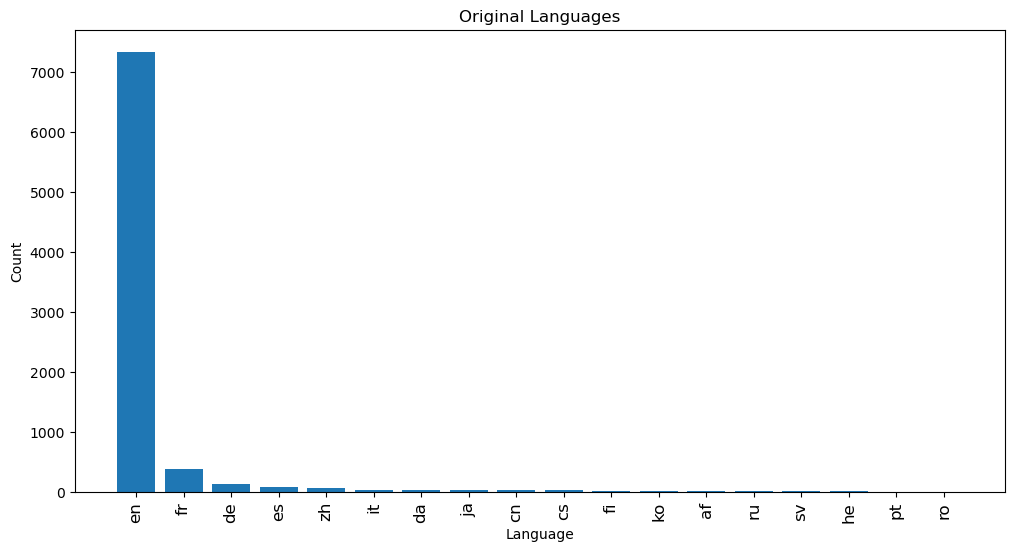

In [12]:
# Count the number of each language
language_counts = df['original_language'].value_counts()

# Plot bar graph
plt.figure(figsize=(12, 6))
plt.bar(language_counts.index, language_counts.values)
plt.title('Original Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=12)
plt.show()

As we can see from the graph, the original language of most of the movies is English. This matches well with the data that most film production companies are from the US and the UK. This also fits well with the fact that half of the language used in most of the films is English.

#### Study the relationship between genre and popularity

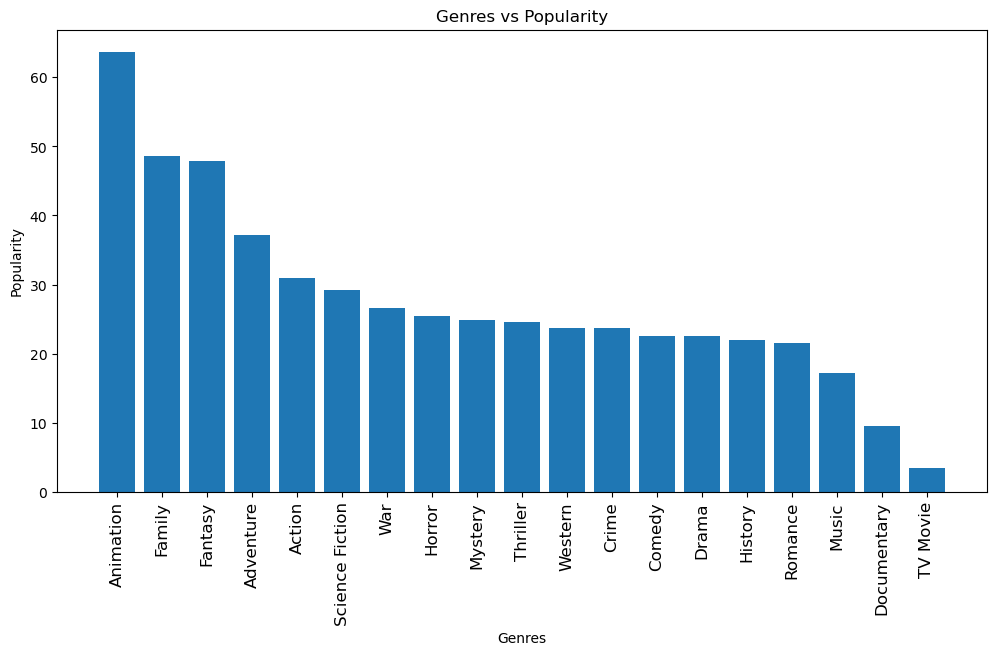

In [13]:
# Group by genres, calculating the average popularity
grouped_data_gp = df.groupby('genres')['popularity'].mean().reset_index()

# Sort by popularity from highest to lowest
grouped_data_gp = grouped_data_gp.sort_values(by='popularity', ascending=False)

# Plot bar graph
plt.figure(figsize=(12, 6))
plt.bar(grouped_data_gp['genres'], grouped_data_gp['popularity'])
plt.title('Genres vs Popularity')
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.xticks(rotation=90, fontsize=12)
plt.show()

The image shows that the top 4 most popular movie genres are Animation, Fantasy, Family, and Adventure.

#### Comparison between budget and revenue with genre at the same time

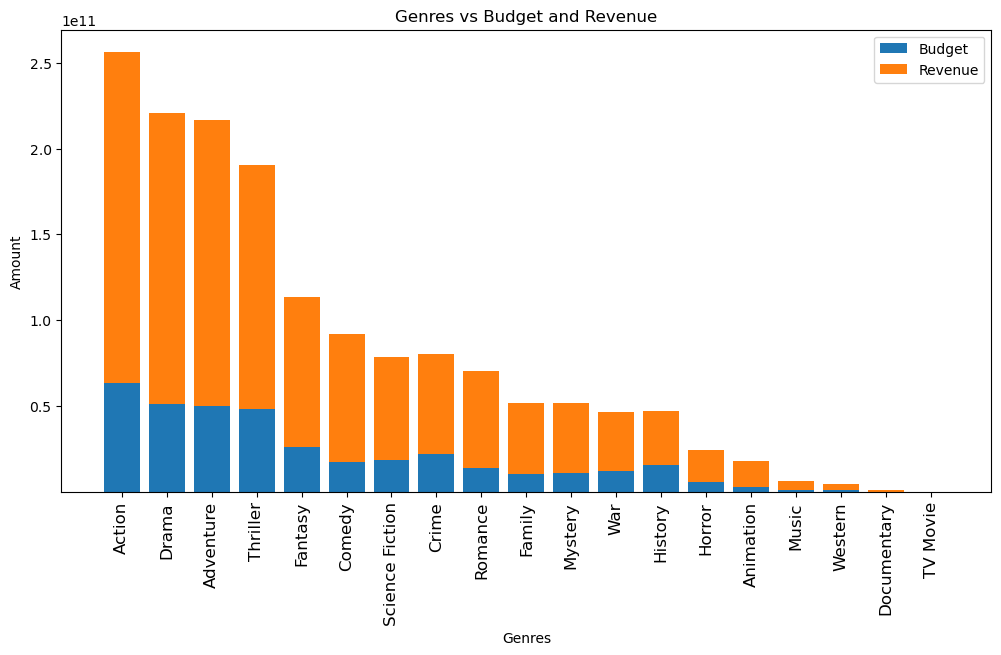

In [14]:
# Calculate the sum of budget and revenue by grouping genres
grouped_data_gbr = df.groupby('genres')[['budget', 'revenue']].sum()

# Sorted by revenue from highest to lowest
grouped_data_gbr = grouped_data_gbr.sort_values(by='revenue', ascending=False)

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(grouped_data_gbr.index, grouped_data_gbr['budget'], label='Budget')
plt.bar(grouped_data_gbr.index, grouped_data_gbr['revenue'], bottom=grouped_data_gbr['budget'], label='Revenue')
plt.title('Genres vs Budget and Revenue')
plt.xlabel('Genres')
plt.ylabel('Amount')
plt.xticks(rotation=90, fontsize=12)
plt.legend()
plt.show()

As we can see, the genre with a high budget also has a high revenue. The two combined ranking in the top 4 genres are: Action, Drama, Adventure, Thriller.

#### Study of annual film production variation with year

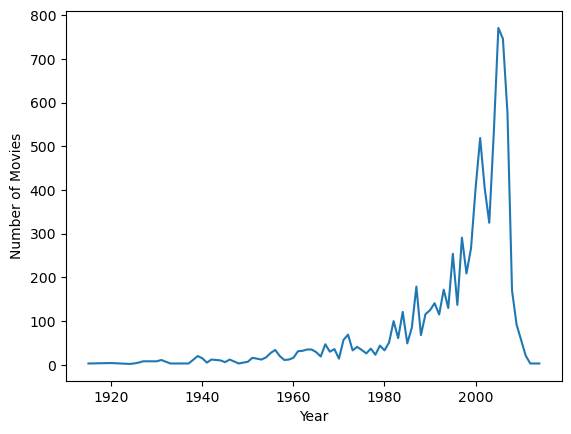

In [15]:
# Convert the release_date column to a date format and extract the year information from it
df['year'] = pd.to_datetime(df['release_date']).dt.year

# Calculate the number of movies per year
yearly_movie_count = df.groupby('year').size()

# Draw line graphs
plt.plot(yearly_movie_count.index, yearly_movie_count.values)

# Set horizontal and vertical coordinate labels and display graphics
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

As we can see from the graph, the film production has been increasing over time. The sudden drop in the number of films shown in the latter part of the curve is caused by the fact that the data for the most recent years were not fully counted. 

#### Study changes in the 4 largest groups of genres data in terms of budget and revenue and predict their changes

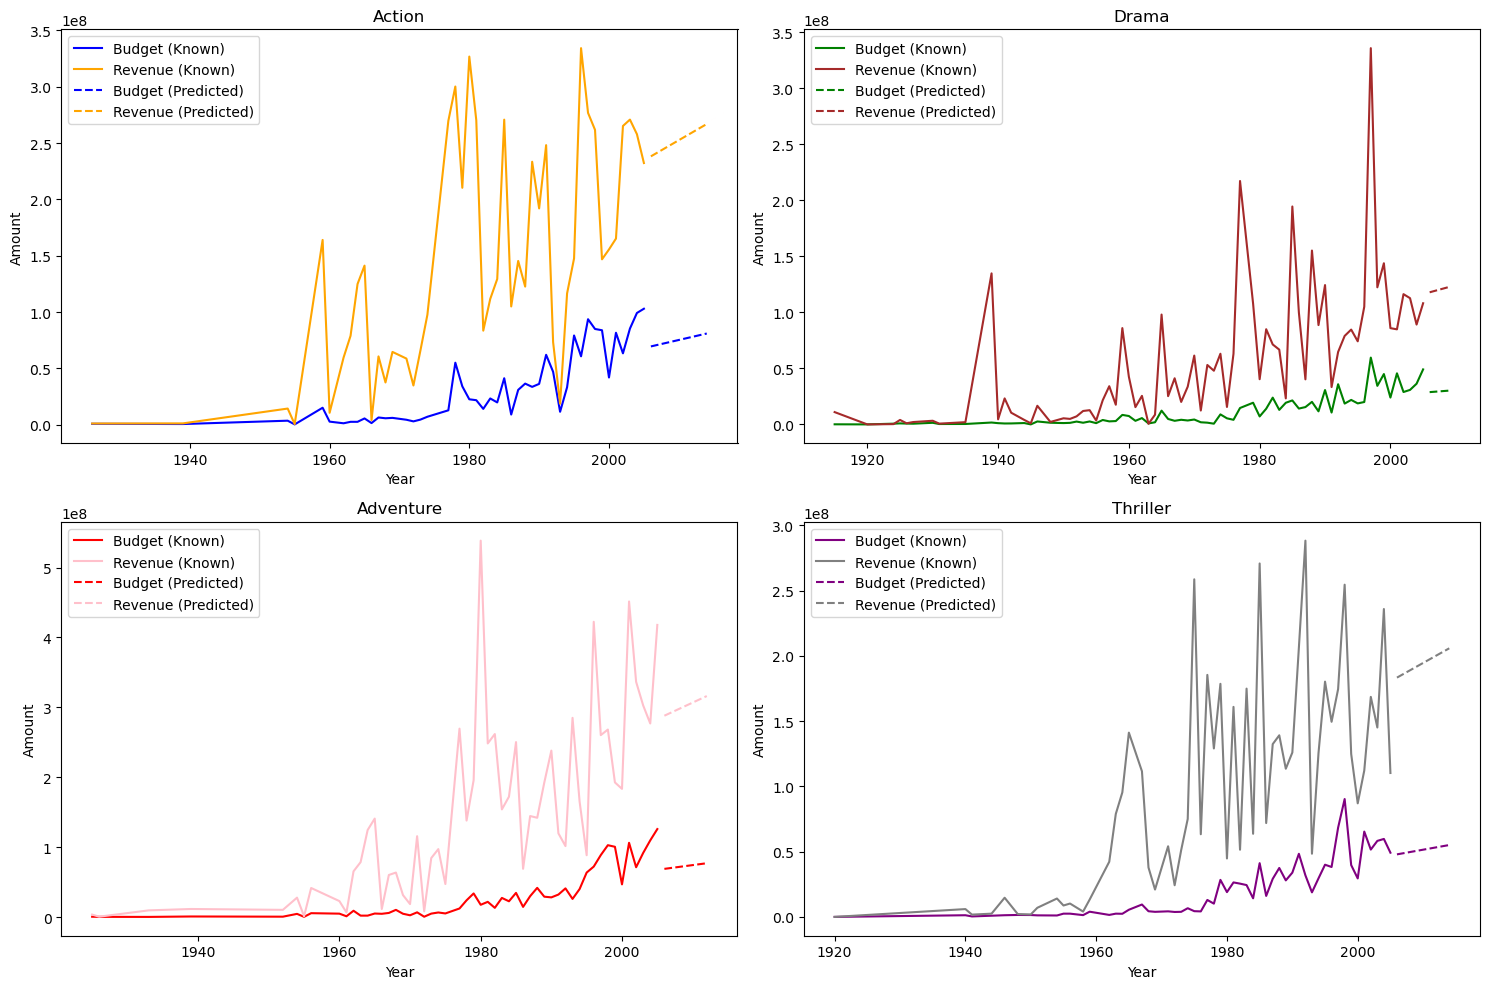

In [16]:
# Select specific genres
selected_genres = ['Action', 'Drama', 'Adventure', 'Thriller']
df_selected = df[df['genres'].isin(selected_genres)]

# Convert release_date to a date type and extract the year
df_selected = df.loc[df['genres'].isin(selected_genres), ['genres', 'release_date', 'budget', 'revenue']].copy()
df_selected['year'] = df_selected['release_date'].dt.year

# Group by genre and year, calculate the average of budget and revenue
grouped_data_gybr = df_selected.groupby(['genres', 'year'])[['budget', 'revenue']].mean()

# Split data into known and predicted data
known_data = grouped_data_gybr.loc[(selected_genres[0], slice(None)), :].reset_index()
future_data = pd.DataFrame({'year': list(range(2006, 2023))})

# Plot graphs of known and predicted data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

colors_budget = ['blue', 'green', 'red', 'purple']
colors_revenue = ['orange', 'brown', 'pink', 'gray']

for i, genre in enumerate(selected_genres):
    # Calculate the average value for each year
    yearly_data = grouped_data_gybr.loc[(genre, slice(None)), :].reset_index()
    # Split data into known and predicted data
    known_data = yearly_data.loc[yearly_data['year'] <= 2005, :]
    future_data = yearly_data.loc[yearly_data['year'] > 2005, :].reset_index(drop=True)
    
    row = i // 2
    col = i % 2
    
    # Plot graphs of known and predicted data
    axes[row, col].plot(known_data['year'], known_data['budget'], color=colors_budget[i], linestyle='-', label='Budget (Known)')
    axes[row, col].plot(known_data['year'], known_data['revenue'], color=colors_revenue[i], linestyle='-', label='Revenue (Known)')

    # Perform linear regression to predict future data
    reg = LinearRegression().fit(known_data['year'].values.reshape(-1, 1), known_data['budget'].values.reshape(-1, 1))
    future_budget = reg.predict(future_data['year'].values.reshape(-1, 1))
    axes[row, col].plot(future_data['year'], future_budget, '--', color=colors_budget[i], label='Budget (Predicted)')

    reg = LinearRegression().fit(known_data['year'].values.reshape(-1, 1), known_data['revenue'].values.reshape(-1, 1))
    future_revenue = reg.predict(future_data['year'].values.reshape(-1, 1))
    axes[row, col].plot(future_data['year'], future_revenue, '--', color=colors_revenue[i], label='Revenue (Predicted)')

    # Set axis labels and titles
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Amount')
    axes[row, col].set_title(genre)

    # Add legends and display charts
    axes[row, col].legend()

plt.tight_layout()
plt.show()

From the graphs, it can be compared that the fluctuation of revenue for all 4 groups of genres is more dramatic than budget and the expected increase is also greater. Excluding individual years, the value of revenue is significantly larger than budget.

### Analyze budget and revenue data using parallel coordinates

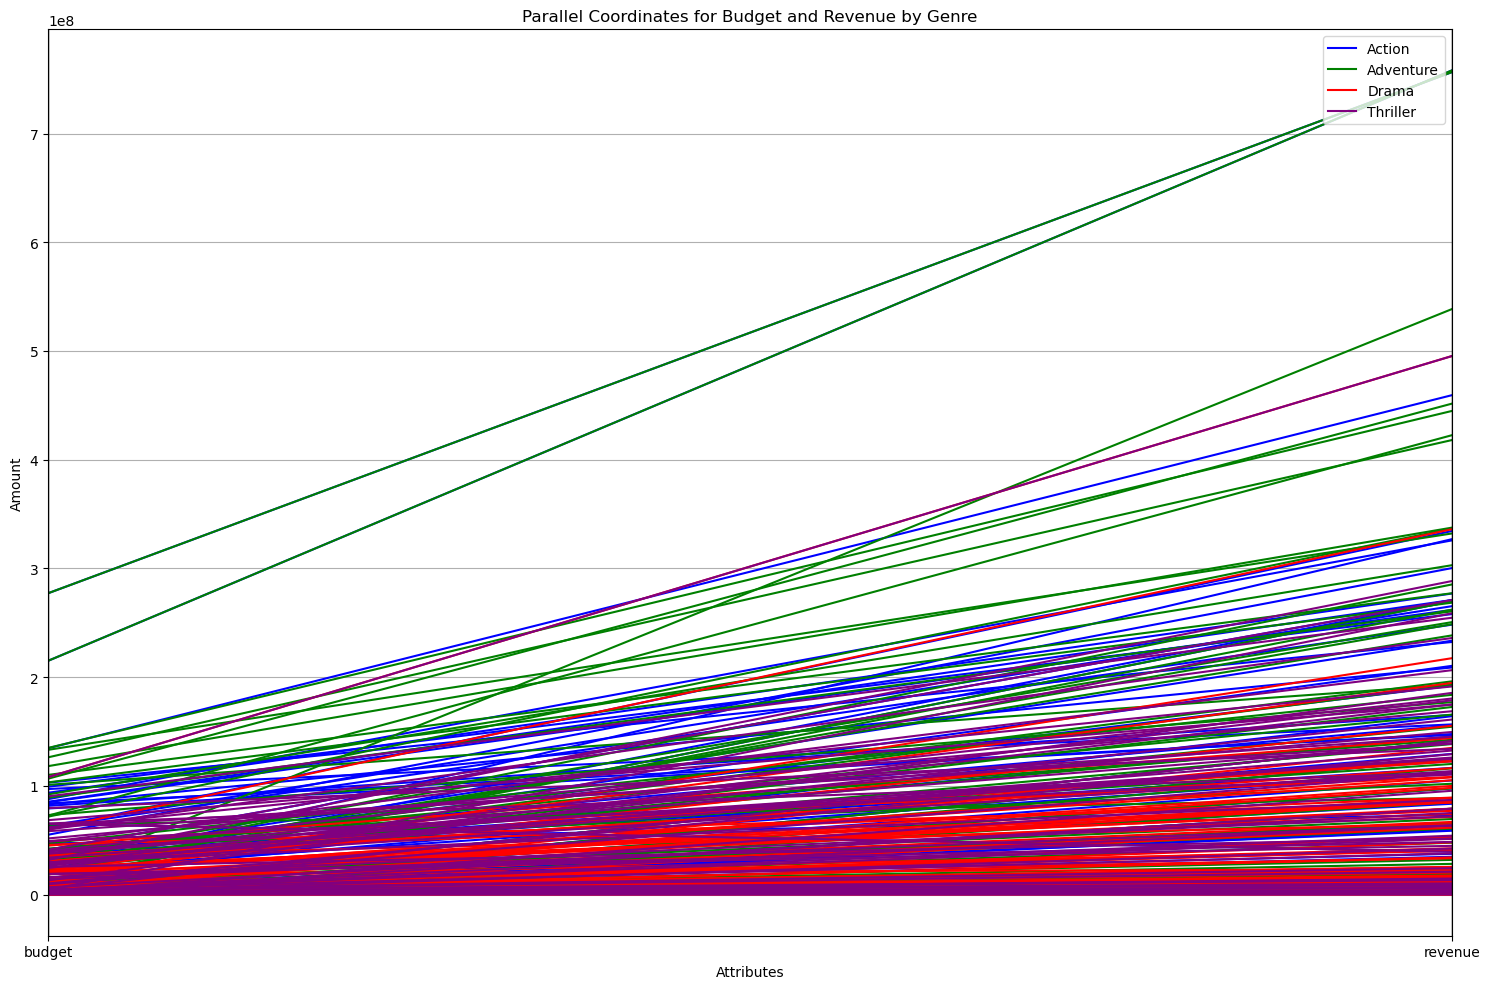

In [17]:
# Group by genre and year, calculate the average of budget and revenue
grouped_data_parallel_gybr = df_selected.groupby(['genres', 'year'])[['budget', 'revenue']].mean().reset_index()

# Plot parallel coordinates
fig, ax = plt.subplots(figsize=(15, 10))
parallel_coordinates(grouped_data_parallel_gybr, 'genres', cols=['budget', 'revenue'], color=['blue', 'green', 'red', 'purple'])

# Set axis labels and title
ax.set_xlabel('Attributes')
ax.set_ylabel('Amount')
ax.set_title('Parallel Coordinates for Budget and Revenue by Genre')

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('parallel_coordinates.png')

# Display the plot
plt.show()


We can see from the graph that very few movies have very high revenue, but their budget is also significantly higher than that of others. No movie has a lower revenue than its budget. Here, I used the function of saving images locally for further research later.

#### Use moving average to study budget and revenue

Considering that in the previously drawn graphs, the fluctuations in revenue are very dramatic, therefore, here, the moving average is used to study the change of budget and revenue over time.

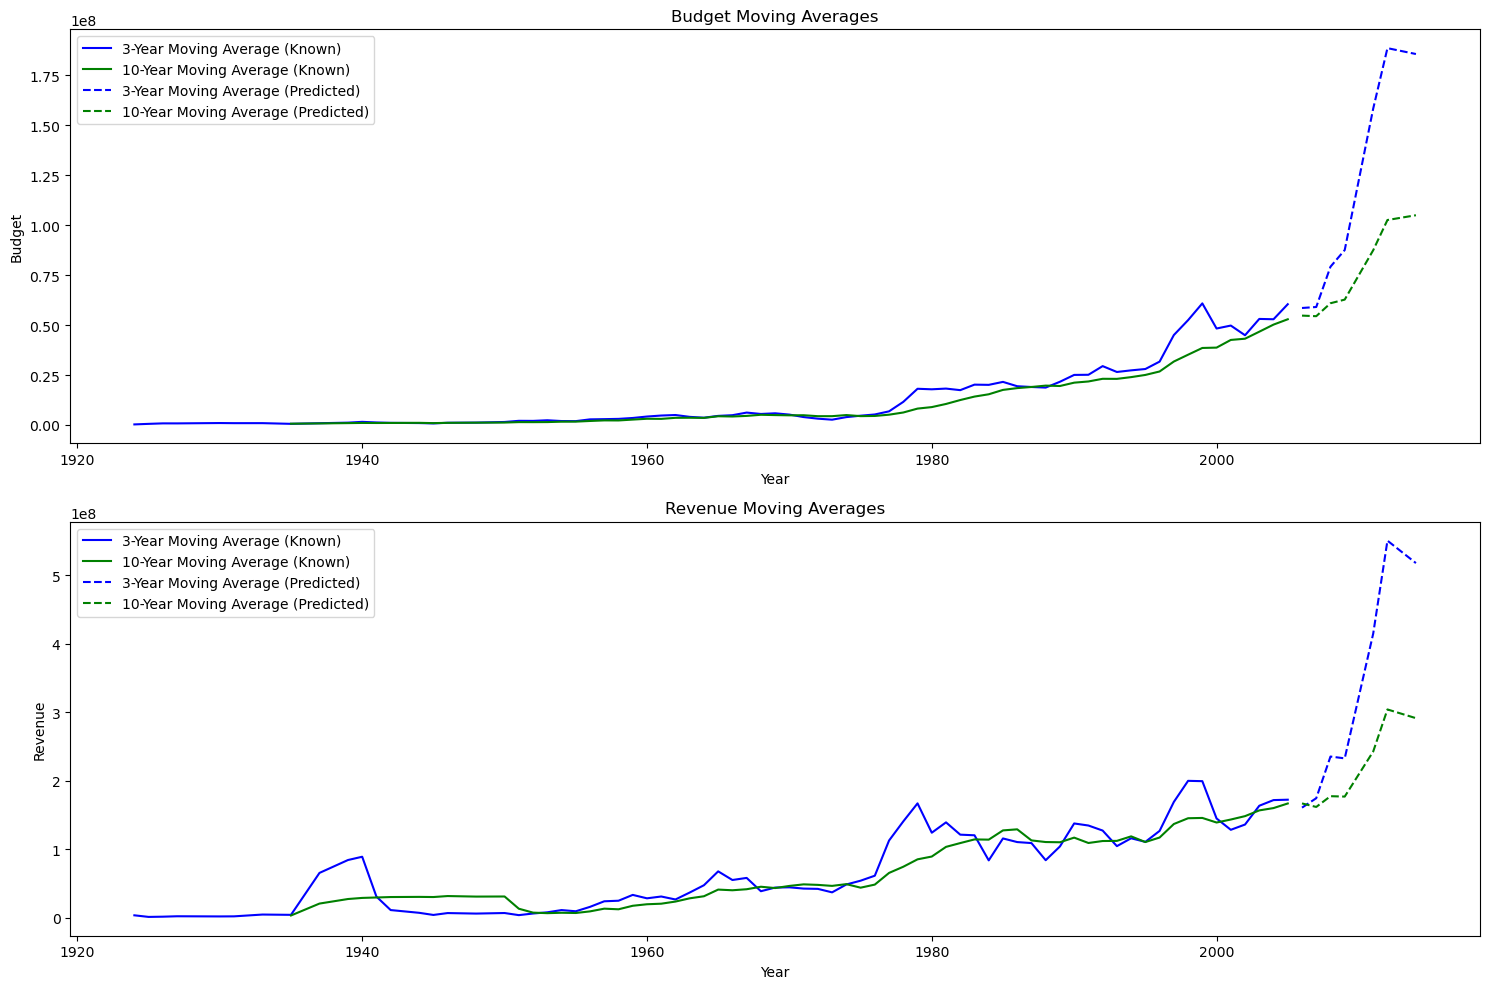

In [18]:
# Group by year, calculate the average of budget and revenue
grouped_data_ybr = df.groupby(['year'])[['budget', 'revenue']].mean()

# Calculate 3-year and 10-year rolling averages
grouped_data_ybr['budget_3yr_ma'] = grouped_data_ybr['budget'].rolling(window=3).mean()
grouped_data_ybr['budget_10yr_ma'] = grouped_data_ybr['budget'].rolling(window=10).mean()
grouped_data_ybr['revenue_3yr_ma'] = grouped_data_ybr['revenue'].rolling(window=3).mean()
grouped_data_ybr['revenue_10yr_ma'] = grouped_data_ybr['revenue'].rolling(window=10).mean()

# Split data into known and predicted data
known_data = grouped_data_ybr[grouped_data_ybr.index <= 2005]
future_data = grouped_data_ybr[grouped_data_ybr.index > 2005]

# Plot graphs of known and predicted data
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

colors = ['blue', 'green']

# Plot Budget
axes[0].plot(known_data.index, known_data['budget_3yr_ma'], color=colors[0], linestyle='-', label='3-Year Moving Average (Known)')
axes[0].plot(known_data.index, known_data['budget_10yr_ma'], color=colors[1], linestyle='-', label='10-Year Moving Average (Known)')
axes[0].plot(future_data.index, future_data['budget_3yr_ma'], '--', color=colors[0], label='3-Year Moving Average (Predicted)')
axes[0].plot(future_data.index, future_data['budget_10yr_ma'], '--', color=colors[1], label='10-Year Moving Average (Predicted)')

# Set axis labels and titles
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Budget')
axes[0].set_title('Budget Moving Averages')

# Add legends
axes[0].legend()

# Plot Revenue
axes[1].plot(known_data.index, known_data['revenue_3yr_ma'], color=colors[0], linestyle='-', label='3-Year Moving Average (Known)')
axes[1].plot(known_data.index, known_data['revenue_10yr_ma'], color=colors[1], linestyle='-', label='10-Year Moving Average (Known)')
axes[1].plot(future_data.index, future_data['revenue_3yr_ma'], '--', color=colors[0], label='3-Year Moving Average (Predicted)')
axes[1].plot(future_data.index, future_data['revenue_10yr_ma'], '--', color=colors[1], label='10-Year Moving Average (Predicted)')

# Set axis labels and titles
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Revenue')
axes[1].set_title('Revenue Moving Averages')

# Add legends
axes[1].legend()

plt.tight_layout()
plt.show()

As we can see, the degree of fluctuation of the curve is much lighter than before. However, the resulting forecast curves are also significantly different. The reason for the significant difference between the forecast curves corresponding to the 3-year moving average and the 10-year moving average is that they each forecast the average change curve over their respective time horizons, which is clearly not the same in the short term.

#### Study the relationship between vote_count and vote_average

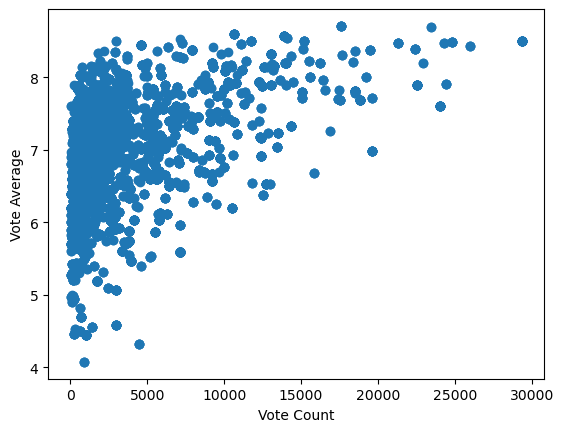

In [19]:
# Plot scatter plots
plt.scatter(df['vote_count'], df['vote_average'])

# Set horizontal and vertical coordinate labels and display graphics
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')
plt.show()

The graph shows that if the movie scores low, it is unlikely that many people will watch the movie and participate in the voting. The number of people who saw the movie and participated in the voting was high, which could only happen if the movie had a high rating.

#### Study the change in movie running time over the years

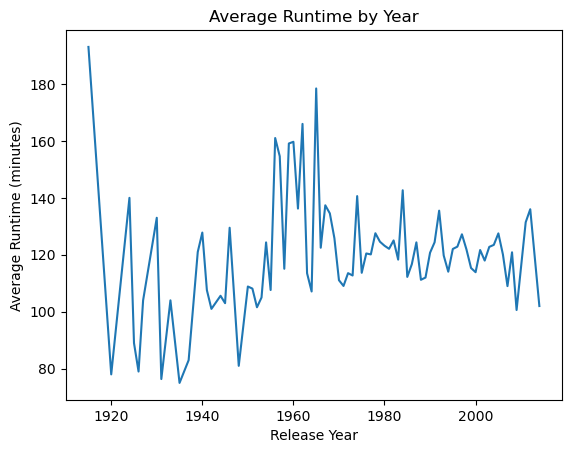

In [20]:
# Calculate the average runtime of movies per year based on year grouping
runtime_by_year = df.groupby('year')['runtime'].mean()

# Plot runtime averages with year using Matplotlib
plt.plot(runtime_by_year.index, runtime_by_year.values)
plt.title('Average Runtime by Year')
plt.xlabel('Release Year')
plt.ylabel('Average Runtime (minutes)')
plt.show()

As we can see from the graph, the average running time of the movies did not produce much change over the years.

#### Use the scatter matrix to analyze the data for all numerical types

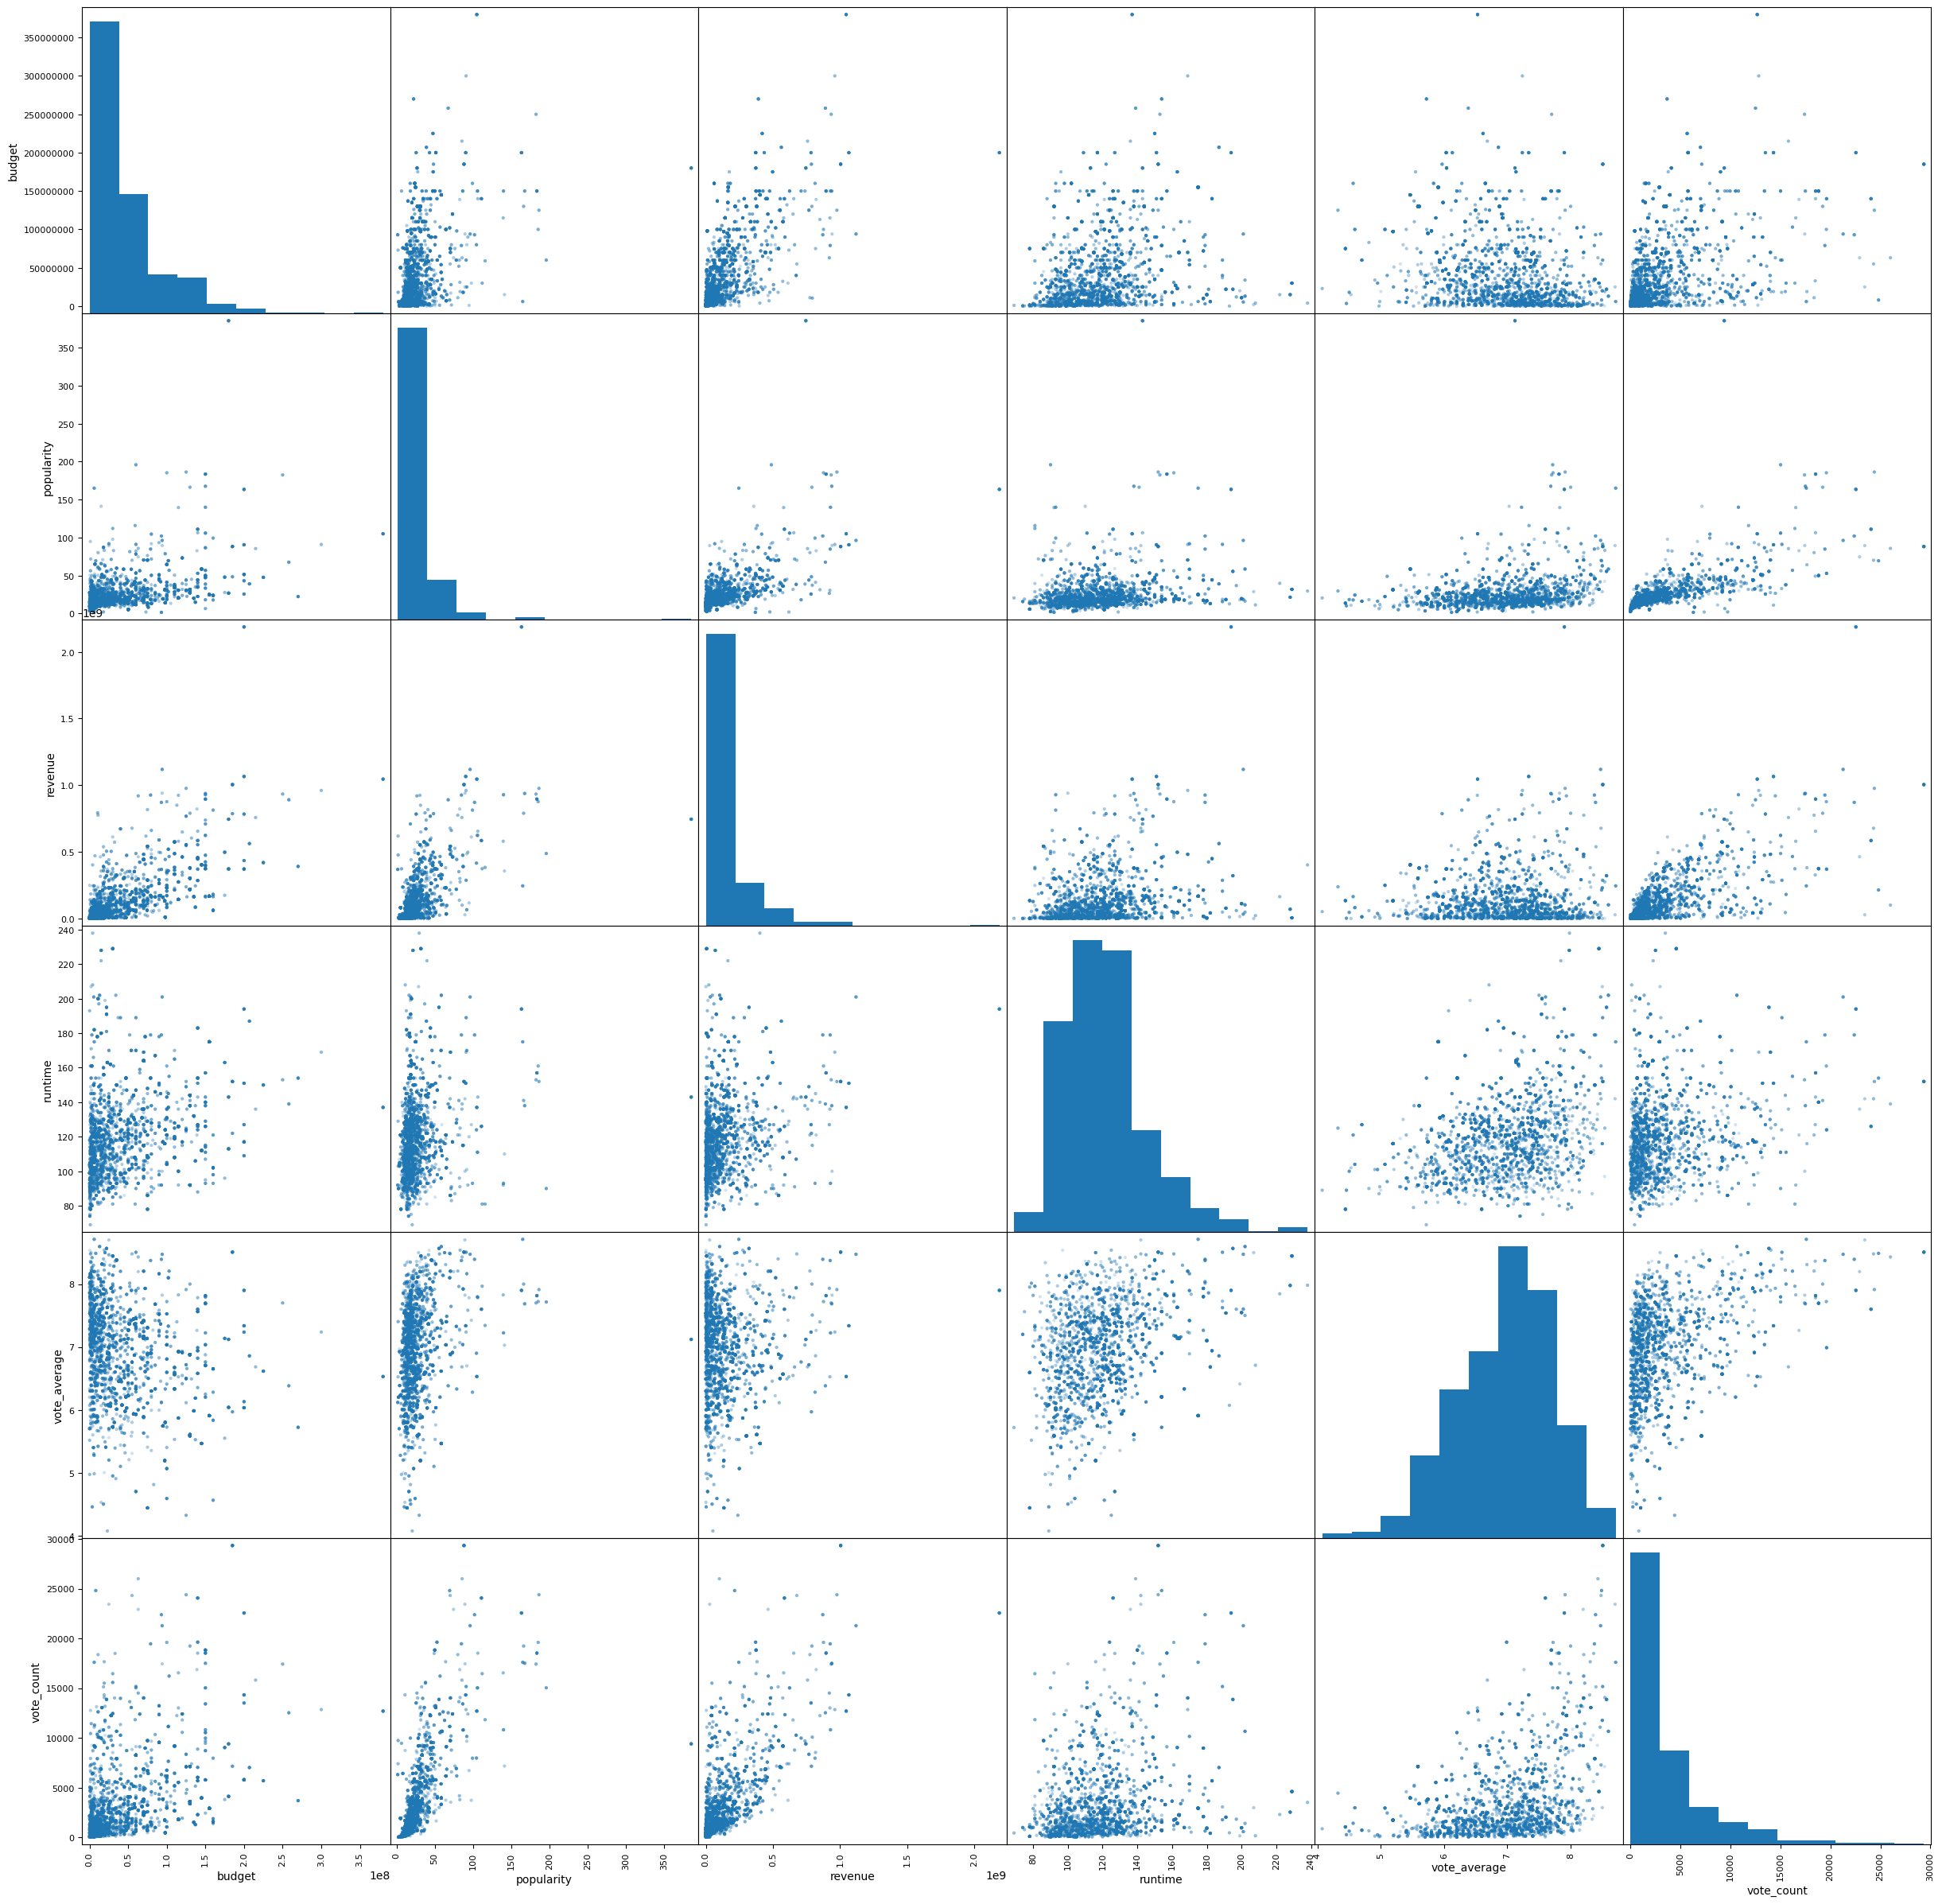

In [21]:
# Filter the required columns
cols = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
df6 = df[cols]

# Plot the scatter matrix
scatter_matrix(df6, alpha=0.2, figsize=(30, 30), diagonal='hist')
plt.show()

Firstly, I analyze the case where the horizontal and vertical coordinates are the same. This corresponds to 6 bar charts. As can be seen, when the horizontal and vertical coordinates are budget, popularity, revenue, and vote_count, the data show Positive Skew. This means that there are a few movies where these four variables are significantly higher than others. When both horizontal and vertical coordinates are runtime or vote_average, the data show Unimodal distribution. This means that there is a common range of values for these 2 variables for most movies. Further, the movie's runtime is often referenced to this value when it is produced. Most of the movies also do not show an overall particularly high or overall particularly low voting score.

Next, I analyze the characteristics of the scatter plot when the horizontal and vertical coordinates are different. It can be seen that some plots have scatter concentrated in the lower left corner and some plots have scatter concentrated in the left edge or lower edge rather than in a corner. If the scatter is mainly concentrated in the lower left corner drop, it indicates that there are large outliers in both the variables corresponding to the horizontal coordinate and the variables corresponding to the vertical coordinate. If the scatter is concentrated only on one of the left or lower edges, and it shows a relatively uniform distribution on this edge, then it means that only 1 variable in the horizontal and vertical coordinates has a large outlier. In fact, the scatter plots where this pattern exists are related to the variables runtime and vote_average. The scatterplot of these two variables with respect to each other has points that do not fit tightly on an edge or are clustered in a corner.

#### Use the correlation matrix to analyze all numeric types of data

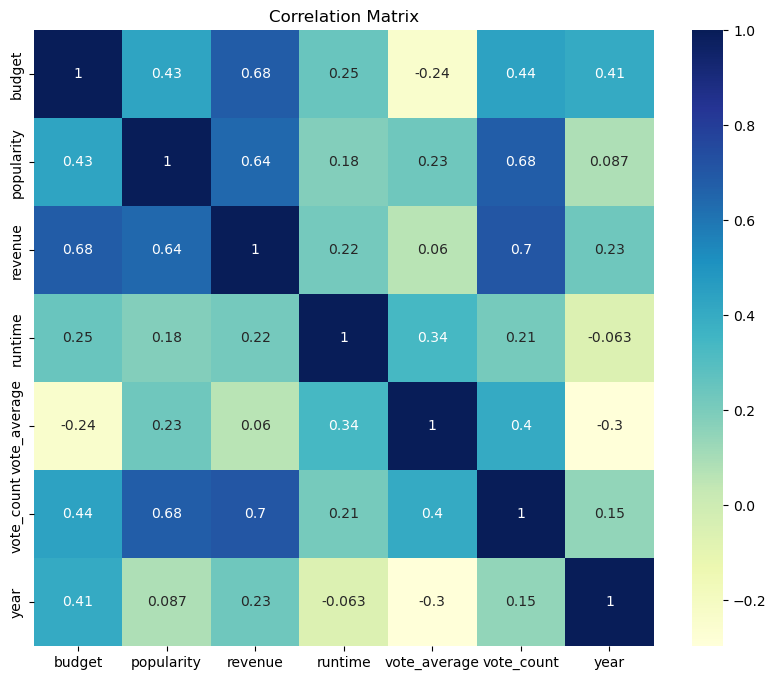

In [22]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heat map
fig = plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix chart, we can see that there are four groups of data that have a relatively high correlation between them. These four sets of data and their correlation figures are: correlation between popularity and revenue is 0.64; correlation between budget and revenue is 0.68; correlation between popularity and vote_count is 0.68; correlation between revenue and vote_count is 0.7. They show respectively that: movies with higher popularity tend to bring in higher revenue; movies with higher budget tend to bring in higher revenue; movies with higher popularity tend to get higher total vote counts; movies with higher budget tend to get higher total vote counts. This provides a very important reference and direction to work on for how to make a great movie.

#### Study the effect of genre choice on voting scores

In the above correlation matrix, we can see that the correlation between vote_average and popularity is not high. The popularity of different genres shows y a certain degree of difference. Now let's examine whether the vote_average of different genres can also show a certain degree of difference.

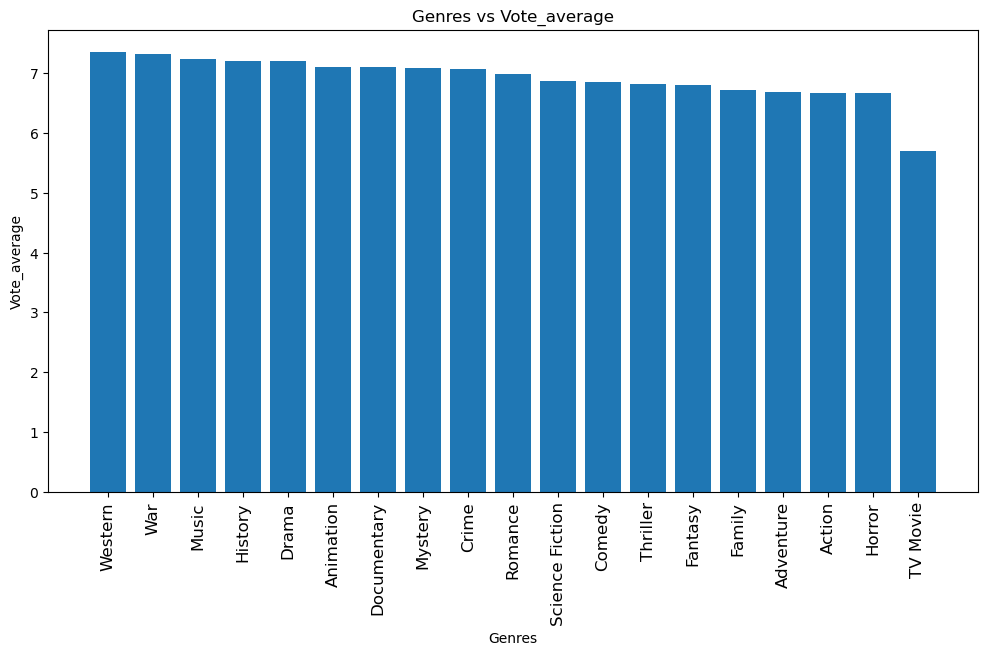

In [23]:
# Group by genres, calculating the average vote_average
grouped_data_gv = df.groupby('genres')['vote_average'].mean().reset_index()

# Sort by vote_average from highest to lowest
grouped_data_gv = grouped_data_gv.sort_values(by='vote_average', ascending=False)

# Plot bar graph
plt.figure(figsize=(12, 6))
plt.bar(grouped_data_gv['genres'], grouped_data_gv['vote_average'])
plt.title('Genres vs Vote_average')
plt.xlabel('Genres')
plt.ylabel('Vote_average')
plt.xticks(rotation=90, fontsize=12)
plt.show()

This image clearly shows that the average number of vote_average is similar for each genre. This means that vote_average is not only not very correlated with popularity, but also not very correlated with genre.

## Conclusion

Challenges faced when collecting data from web APIs:
1. Many APIs have data collection limits for a certain period of time, which means that only a limited amount of data can be requested at a given time, which may limit the speed and efficiency of large-scale data collection.
2. Some APIs require user authentication and authorization, which may increase the complexity of accessing and using the API.
3. APIs may change, become obsolete, or fail, which may result in code that collects data needing to be continually updated to accommodate changes to the APIs. 
4. The documentation and support for the API may be incomplete or unclear, which may make it more difficult to understand and use the API. 

Key insights from the data analysis:
1. Pie charts can clearly show the percentages of different components, and switching to bar charts is only appropriate when the percentages appear to be dominated by a family.
2. By performing linear regression forecasts on known data, we can identify trends in budgets and box office revenues for these film genres over the next few years.
3. Correlation analysis makes it easier to deal with different data and can help to narrow down the scope of the study quickly.

Ideas for further analysis of the data:
1. Alternative regression methods (e.g. polynomial regression, ridge regression, etc.) can be used to forecast future budgets and box office revenues to find potentially more accurate forecasting models.
2. Other attributes that affect movie performance, such as directors, actors, etc., can be analyzed to understand the impact of these factors on the rest of the movie's data.
3. Film markets in different regions can be studied to examine the differences in people's preferences and the differences in profitability in different regions.